In [2]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import random
import time

In [31]:
def volume_hypersphere(N,M): 
    """
    estimates the volume of a unit hypersphere (a sphere of radius 1) in N-dimensional 
    space using Monte Carlo simulation. It generates M random points uniformly within the 
    N-dimensional unit hypercube. For each point, it calculates the Euclidean distance 
    from the origin. If this distance is less than 1, the point lies within the hypersphere.
    """
    # M random numbers for each of N dimensions
    x = []
    for i in range(N): x.append(stats.uniform(0,1).rvs(M))
    x = np.array(x)
    
    sum = 0
    for i in range(N): 
        sum += x[i,:]**2
    r = np.sqrt(sum)

    return 2**N*np.sum(r < 1)/M

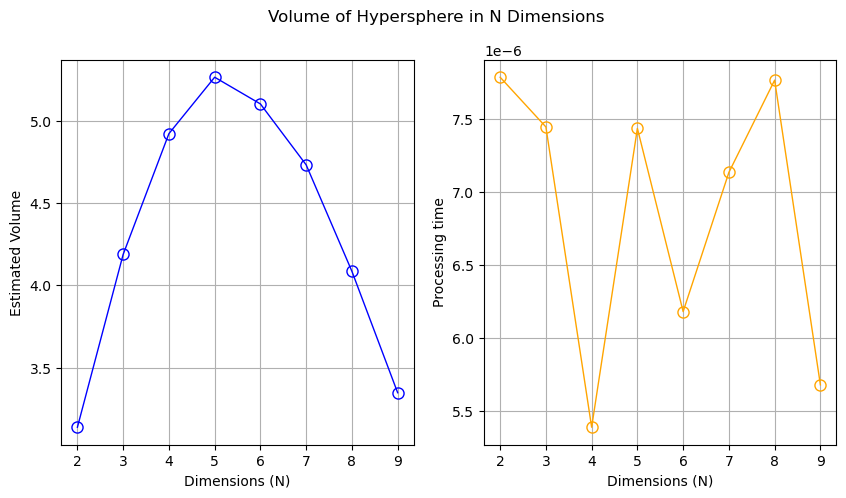

In [36]:
M = 100000 # number of random points
N=np.arange(2,10,1)
V=[]
elapsed_time=[]

for n in N:
    V.append(volume_hypersphere(n,M))
    t_start = time.process_time() 
    t_stop = time.process_time()
    elapsed_time.append(t_stop-t_start)

###

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Volume of Hypersphere in N Dimensions")

ax1.plot(N, V, marker='o', markerfacecolor='none', markeredgecolor='blue', markersize=8, linestyle='-', color='blue', linewidth=1)

ax1.set_xlabel("Dimensions (N)")
ax1.set_ylabel("Estimated Volume")
ax1.grid(True)

ax2.plot(N, elapsed_time, marker='o', markerfacecolor='none', markeredgecolor='orange', markersize=8, linestyle='-', color='orange', linewidth=1)

ax2.set_xlabel("Dimensions (N)")
ax2.set_ylabel("Processing time")
#ax1.title("Volume of Hypersphere in N Dimensions")
ax2.grid(True)

plt.show()